In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# View all of the classes that automap found
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [8]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23')

In [9]:
recent_date[0][8:]

'23'

In [10]:
recent_month = int(recent_date[0][5:7])
recent_day = int(recent_date[0][8:])
recent_year = int(recent_date[0][0:4])


In [11]:
# date 365 days ago from today
# can this be done with recent date as variable
year_ago = dt.date(recent_year, recent_month, recent_day) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [12]:
# date 365 days ago from today
# can this be done with recent date as variable
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [13]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.
result = session.query(Measurement.date, func.avg(Measurement.prcp)).group_by(Measurement.date).\
order_by(Measurement.date).filter(Measurement.date >= year_ago).all()


In [14]:
# Convert your results into a pandas DataFrame with date as index.
prcp_df = pd.DataFrame(result, columns=['Date', 'Precipitation']).set_index("Date")
prcp_df.dropna(inplace=True)


In [15]:
len(prcp_df.index)

366

In [16]:
x_labels = []
x_ticks = []
for i in range(0,len(prcp_df.index),60):
    x_labels.append(prcp_df.index[i])
    x_ticks.append(i)
print(x_labels)
print(x_ticks)

['2016-08-23', '2016-10-22', '2016-12-21', '2017-02-19', '2017-04-20', '2017-06-19', '2017-08-18']
[0, 60, 120, 180, 240, 300, 360]


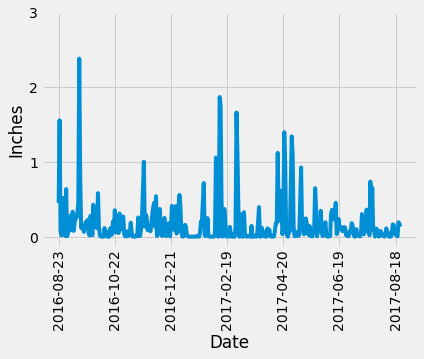

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.plot(prcp_df.index, prcp_df['Precipitation'])
y = prcp_df["Precipitation"]
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(list(x_ticks), x_labels, rotation="vertical")
plt.yticks(np.arange(0, max(y)+1, 1))
plt.show()


In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [20]:
# Query total number of stations in dataset
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station)).all()

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [22]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.
session.query(Measurement.station, func.max(Measurement.tobs), \
              func.min(Measurement.tobs), \
              func.avg(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

In [23]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.
tobs = session.query(Measurement.station, Measurement.tobs).\
            filter(Measurement.station == 'USC00519281').filter(Measurement.date >= year_ago).all()


In [24]:
tobs_df = pd.DataFrame(tobs, columns=["ID","Temperature"])

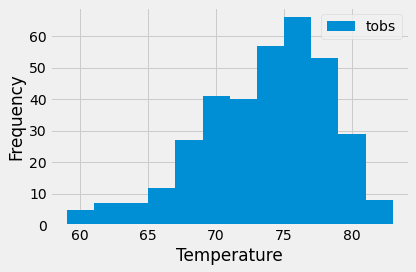

In [25]:
plt.hist(tobs_df["Temperature"],bins = 12, label = "tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Close session

In [26]:
# # Close the session
session.close()